## EDA

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/Brain_GSE50161.csv')

In [ ]:
feature_names = train.columns.tolist()

In [ ]:
train['samples'] = train['samples'].astype('object')

In [ ]:
# Read in mapping file
mapping_df = pd.read_csv('/content/U133A.AffymetrixMapping.txt.gz', sep='\t', header=None, compression='gzip')

mapping_df.columns = ['Probe_Set_ID', 'Gene_Symbol']
# Set index to probe set ID column
mapping_df = mapping_df.set_index('Probe_Set_ID')

# Create dictionary mapping probe set IDs to gene symbols
mapping_dict = mapping_df['Gene_Symbol'].to_dict()

# Rename columns in your data frame using the mapping dictionary
train = train.rename(columns=mapping_dict)

In [ ]:
#isolate all the columns that are control probe which are not associated with any gene
def isolate_control_probes(df):
    return df.loc[:, df.columns.str.contains('AFFX')]

droppable_columns_train = isolate_control_probes(train)

In [ ]:
train.drop(droppable_columns_train, axis = 1, inplace = True)

In [ ]:
synaptic_gene = [['221914_at', '210315_at']]

In [ ]:
train.shape

(130, 54625)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 54625 entries, samples to STAT1
dtypes: float64(54623), object(2)
memory usage: 54.2+ MB


In [ ]:
kind_of_cancer = train.type.value_counts(normalize = True).to_frame()
kind_of_cancer

,type
ependymoma,0.353846
glioblastoma,0.261538
medulloblastoma,0.169231
pilocytic_astrocytoma,0.115385
normal,0.100000


In [ ]:
train

,samples,type,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,...,ACTB,ACTB,ACTB,GAPDH,GAPDH,GAPDH,STAT1,STAT1,STAT1,STAT1
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,13.087353,12.786701,13.104597,13.027510,12.818440,13.092592,9.104209,5.109471,8.654586,7.452986
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,13.912946,13.532344,13.814658,14.237459,14.207599,14.229670,10.411498,6.596325,9.264731,9.122687
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,14.378190,13.937428,14.248673,14.402930,14.358498,14.447217,11.321259,7.055909,10.012080,9.822739
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,13.755865,13.383430,13.660059,13.369370,13.275533,13.457756,9.924395,4.879474,7.772589,8.028984
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,14.077636,13.760155,14.042310,13.835195,13.775659,14.029920,10.786574,6.663534,9.746172,9.086955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,959,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,...,13.967509,13.242701,13.713351,13.663155,13.556110,13.609845,10.719271,5.168568,7.882683,8.359550
126,960,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,...,13.896949,13.232039,13.696252,14.382744,14.189464,14.382647,10.303234,5.620523,8.571982,8.257289
127,961,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,...,13.823257,12.218713,13.097621,13.699895,13.459481,13.556569,11.074307,4.978460,7.702762,8.822692
128,962,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,...,13.935221,13.133453,13.494138,13.499406,13.290106,13.422512,10.848698,5.173532,7.911927,8.689571


## Divide Data

In [ ]:
from sklearn.model_selection import train_test_split

X = train.iloc[:,2:]
y = train.type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Encoding

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#apply StandardScaler
from category_encoders import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from imblearn.over_sampling import SMOTE

ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_val_ss = ss.transform(X_val)
X_test_ss = ss.transform(X_test)

In [ ]:
X_train_ss.shape

(83, 54623)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

## PCA

In [ ]:
# apply pca to simplifiy the data, maximum is 20, more than that, the MLPClassifer can't analyze.
from sklearn.decomposition import PCA

pca = PCA(20) 
X_train_ss2 =pca.fit_transform(X_train_ss)
X_val_ss2 = pca.transform(X_val_ss)
X_test_ss2 = pca.transform(X_test_ss)

In [ ]:
X_train_ss2.shape

(83, 20)

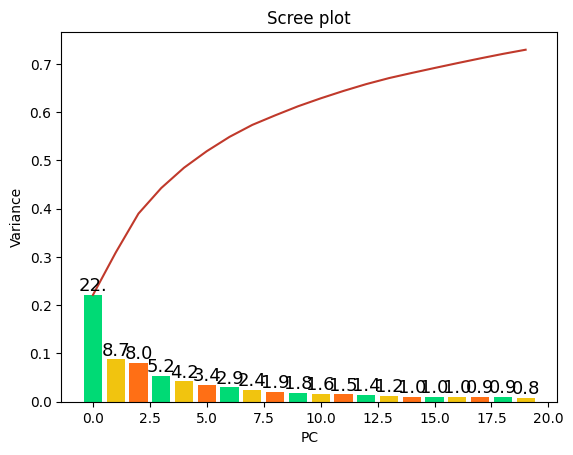

In [ ]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)

In [ ]:
# change the name of columns
def pca_to_df(df):
    new_df = pd.DataFrame(df,columns=["PC1","PC2","PC3","PC4", "PC5", "PC6","PC7","PC8","PC9", "PC10", "PC11","PC12","PC13","PC14", "PC15", "PC16","PC17","PC18","PC19", "PC20"])
    return new_df

X_train_pca = pca_to_df(X_train_ss2)
X_val_pca = pca_to_df(X_val_ss2)
X_test_pca = pca_to_df(X_test_ss2)

In [ ]:
X_train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,135.303255,123.757328,-53.528356,2.479486,-28.587100,8.987730,52.477056,-52.097752,-14.409180,57.168157,-22.564805,20.667621,-14.430597,-40.640308,10.753212,17.225090,8.097866,19.895950,3.839483,11.483311
1,-128.877812,-105.909829,43.004261,-13.052259,-63.837231,-39.508965,5.361919,22.473286,-72.535165,19.130705,8.225316,28.654980,-28.879297,14.814483,-11.241569,8.286049,1.466119,-0.181258,54.584683,-6.343435
2,34.421738,74.655222,-131.932118,46.943154,-82.543479,5.600121,0.556854,27.753226,-36.224381,86.501357,-32.528937,-4.643573,-25.084914,9.305370,24.425073,29.011034,26.017082,-24.598311,-15.348851,-16.851723
3,129.217590,-33.977822,-25.068070,-38.687267,-26.370906,2.584979,53.667139,-15.691586,38.702173,32.367970,44.344214,-22.946183,22.868851,34.705396,20.547784,-1.793367,-17.576728,11.223292,-6.367572,30.096957
4,18.248996,78.927951,116.532842,68.631053,-83.653151,68.597736,-26.491690,-22.053740,24.909729,-28.309617,1.739346,9.761359,-5.436033,11.957009,3.627395,-9.561390,-19.753636,7.736437,-25.416064,6.105659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,126.608128,-20.873477,28.574235,-82.111695,-44.091663,-26.037361,-13.101307,-19.332707,-0.560157,-12.119237,-11.772074,7.416430,19.021757,9.009470,-7.017133,-21.605259,13.999023,26.431862,0.095003,-25.083208
79,-118.636524,96.655547,-56.524673,-30.179038,4.983425,-45.211010,-1.372761,64.933002,-20.195343,61.389393,-37.168854,-33.778505,-3.295074,66.198467,-31.935255,3.014811,-54.156471,40.176736,-2.338501,71.385071
80,108.043366,-63.335294,-26.569312,42.022200,79.608733,17.502006,-6.485712,19.822752,43.570007,19.157415,-20.237463,31.801337,-41.450196,64.044341,-10.350613,7.005393,-0.970615,-2.977247,-2.576180,10.476127
81,107.393356,61.626533,67.917886,134.972308,-87.642220,20.499883,53.195953,13.607218,14.723126,-48.278613,7.096608,-28.261562,-6.219342,33.198906,-8.654985,-20.695913,-18.019045,-15.523963,-11.462638,-9.306788


In [ ]:
X_val_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,120.631732,-41.184196,0.911016,-36.635698,-50.771907,13.493227,43.829119,7.465375,-10.431186,2.555388,-10.311220,22.327063,36.452298,7.300793,-2.656272,7.735359,3.071694,-12.829086,-4.516265,7.650699
1,51.598272,-62.977191,27.611362,92.338744,24.517814,-31.792520,30.266902,32.380690,-39.131775,35.518841,21.635908,-14.984949,-21.627938,6.638774,-18.019072,-4.311309,2.646960,-11.334335,-6.067351,-22.931652
2,-162.330839,-48.835165,-32.469185,2.939083,37.013354,-60.975240,-45.293218,30.523962,36.572797,6.506014,-34.155601,-27.709284,1.117891,2.583175,17.737084,20.762186,-0.877748,-10.130623,12.953039,-13.202601
3,-134.549766,-26.190941,-16.959355,9.347017,39.493831,-57.045426,-21.196966,16.707248,31.505098,11.612496,-28.354502,-30.510842,22.251942,-13.202079,4.005221,17.193057,7.861331,-11.614384,7.281964,-5.427201
4,-94.609518,-35.857116,58.862795,34.984465,41.608080,26.551409,7.608483,-12.396251,-5.675503,-7.085146,-3.480482,1.113643,-19.339434,-2.272815,-2.592702,0.486863,8.974913,41.289942,9.210598,-8.154677
5,69.327283,8.305810,-96.347082,19.914565,55.224070,15.562965,1.268034,61.936875,-4.527899,-21.789707,-12.915710,-42.037929,12.298385,12.907365,36.875460,-3.010645,14.239398,-8.899474,14.662580,-23.021027
6,58.119166,-45.279262,-11.038992,89.645166,16.717317,-14.431474,-25.505014,-10.789342,-16.877946,37.758890,20.665514,3.826108,18.459399,-0.100450,-11.059341,-4.401566,-3.427295,-20.638513,-14.222135,-2.352217
7,53.399857,-54.640691,-14.981151,-7.049289,-56.627122,-11.113355,33.248016,71.752192,-34.061029,6.021440,3.231583,1.658168,9.091388,0.172277,11.231398,-21.950582,5.561808,-19.774901,2.326861,1.595524
8,-144.106960,-55.884075,-5.988492,7.835455,61.758575,-26.154728,-29.831162,-5.875729,43.583564,3.078535,-37.460639,-13.837687,-6.792971,2.945075,4.160170,31.830543,-2.343733,-5.521961,2.873188,-10.110213
9,-119.634257,-10.879771,101.756264,-136.984601,-21.648154,33.575619,10.831457,-20.321992,-20.770934,-14.843205,0.581997,5.720214,27.983773,-15.893368,-10.742507,27.173773,-13.744637,-9.056577,-20.471844,3.790882


In [ ]:
X_test_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,84.080951,-88.960574,-11.420348,-14.037605,-57.218632,47.728437,40.381321,3.868013,-33.952505,-23.474429,5.004756,5.477764,6.881552,11.482678,-20.445197,6.376725,-4.045400,-20.234984,-12.148120,0.912969
1,85.866533,-67.355033,-7.446238,15.146759,-5.511643,11.816980,42.102056,56.404212,-11.315359,-5.707197,-11.392052,16.250273,-7.044617,-2.726033,-2.100647,-20.303929,-7.218084,-27.334967,-4.037410,7.798182
2,95.232522,10.823738,-65.622158,-4.154300,40.797044,35.793767,26.678195,-5.634933,24.822215,-10.740316,-4.732406,10.448258,23.814866,-5.912436,2.965177,-0.953375,18.915038,7.260831,19.315711,1.056306
3,-139.123008,-78.069324,-10.709573,-52.039155,-40.487080,-32.890724,-5.506849,21.040153,-4.135974,-24.767881,-39.965829,-6.008915,21.267376,-3.464845,27.065834,5.905229,-0.510642,-1.990186,10.124141,-8.513182
4,108.855868,92.176070,-82.473300,6.533902,-42.898359,18.250913,4.339324,-34.355115,-21.497907,44.415333,-22.786778,-7.969587,-14.769080,-5.451864,9.779243,18.222978,-8.842257,9.109871,8.822624,5.819344
5,-159.670474,-30.355469,-58.610184,-2.977654,-14.005029,-45.139902,-29.189094,23.644772,-4.488096,23.036101,-2.108885,-20.751009,24.901383,33.800797,11.998625,5.884120,20.740079,3.770325,13.952941,-4.482121
6,77.486717,-46.525858,-70.472274,-9.779666,-46.224961,39.085662,16.137434,-5.369182,39.589823,38.225234,42.863036,-15.933817,16.228427,5.808785,4.479832,-3.038080,11.961979,-6.833107,11.943137,-10.400228
7,-37.974533,85.390435,-6.644225,69.446674,-106.928734,12.923774,-58.677176,56.514493,7.679893,31.419335,2.725764,-2.008540,-7.535382,-10.985266,-8.290853,-14.512522,22.915364,-7.983798,15.036873,22.759016
8,-40.100570,-92.311593,42.469165,-14.432051,-5.704063,52.481171,-7.491929,10.750067,-9.384529,1.109956,-13.976019,40.807708,-43.429940,-4.303694,2.315878,-13.731190,-20.686605,-4.811339,-8.534911,16.218049
9,-130.594621,8.782762,-24.461516,-11.333802,77.628001,32.750796,-20.242699,-37.206627,-2.477087,-28.974265,-11.629231,-20.814887,28.565560,-1.675844,18.058542,1.717254,2.058909,3.692436,-6.009503,-5.425113


## Neural Networks for multi-class classification

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

def grid_search_mlp(X_train, y_train, param_grid, levels=2, early_stopping=True):
    mlp_model = MLPClassifier(random_state=42)
    best_params = {}

    # Level 1 parameters
    level1_params = {
        'hidden_layer_sizes': param_grid['hidden_layer_sizes'],
        'activation': param_grid['activation'],
        'solver': param_grid['solver'],
        'alpha': param_grid['alpha'],
        'learning_rate_init': param_grid['learning_rate_init']
    }

    level1_search = GridSearchCV(mlp_model, level1_params, cv=5)
    level1_search.fit(X_train, y_train)
    best_params.update(level1_search.best_params_)

    # Level 2 parameters
    if levels > 1:
        level2_params = {
            'batch_size': param_grid.get('batch_size', [200]),
            'max_iter': param_grid.get('max_iter', [200]),
            'tol': param_grid.get('tol', [1e-4]),
            'momentum': param_grid.get('momentum', [0.9])
        }

        mlp_model.set_params(**best_params)

        # Add early stopping
        if early_stopping:
            level2_params['early_stopping'] = [True]
            level2_params['validation_fraction'] = [0.1]

        level2_search = GridSearchCV(mlp_model, level2_params, cv=5)
        level2_search.fit(X_train, y_train)
        best_params.update(level2_search.best_params_)
        print(best_params)


In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'batch_size': [50, 60, 75, 80],
    'max_iter': [100, 200],
    'tol': [1e-4, 1e-3],
    'momentum': [0.9, 0.95, 0.99]
}


clf = grid_search_mlp(X_train_pca, y_train, param_grid, levels = 2, )
print(clf)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'solver': 'adam', 'batch_size': 50, 'early_stopping': True, 'max_iter': 100, 'momentum': 0.9, 'tol': 0.0001, 'validation_fraction': 0.1}
GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='logistic', batch_size=50,
                                     early_stopping=True,
                                     hidden_layer_sizes=(50,), max_iter=100,
                                     random_state=42),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'batch_size': [50, 60, 75, 80],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200], 'momentum': [0.9, 0.95, 0.99],
              

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


In [ ]:
from imblearn.over_sampling import SMOTE

clf = MLPClassifier(
    hidden_layer_sizes=(50,50),
    batch_size = 75, 
    max_iter=500, 
    alpha=0.0001, 
    solver='adam',
    activation='logistic',
    learning_rate_init = 0.1,
    momentum = 0.99,
    tol = 0.0005,
    early_stopping = True,
    validation_fraction = 0.1
     
    )

X_train_sampled, y_train_sampled = SMOTE(random_state=42).fit_resample(
    X_train_pca, y_train
)

clf.fit(X_train_sampled, y_train_sampled)

MLPClassifier(activation='logistic', batch_size=75, early_stopping=True,
              hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=500,
              momentum=0.99, tol=0.0005)

In [ ]:
y_val_pred_nn = clf.predict(X_val_pca)
y_test_pred_nn = clf.predict(X_test_pca)

# Compute hamming loss
hamming_val = hamming_loss(y_val, y_val_pred_nn)
hamming_test = hamming_loss(y_test, y_test_pred_nn)

# Print confusion matrix for validation and test data
conf_mat_val = multilabel_confusion_matrix(y_val, y_val_pred_nn)
conf_mat_test = multilabel_confusion_matrix(y_test, y_test_pred_nn)
print('Confusion matrix for validation data:\n', conf_mat_val)
print('Confusion matrix for test data:\n', conf_mat_test)

# Print evaluation metrics
print('Hamming loss on validation data:', hamming_val)
print('Hamming loss on test data:', hamming_test)

Confusion matrix for validation data:
 [[[13  0]
  [ 0  8]]

 [[12  0]
  [ 2  7]]

 [[19  0]
  [ 0  2]]

 [[17  2]
  [ 0  2]]]
Confusion matrix for test data:
 [[[16  1]
  [ 0  9]]

 [[19  0]
  [ 1  6]]

 [[22  0]
  [ 0  4]]

 [[23  0]
  [ 0  3]]

 [[23  0]
  [ 0  3]]]
Hamming loss on validation data: 0.09523809523809523
Hamming loss on test data: 0.038461538461538464


## Feature Importance

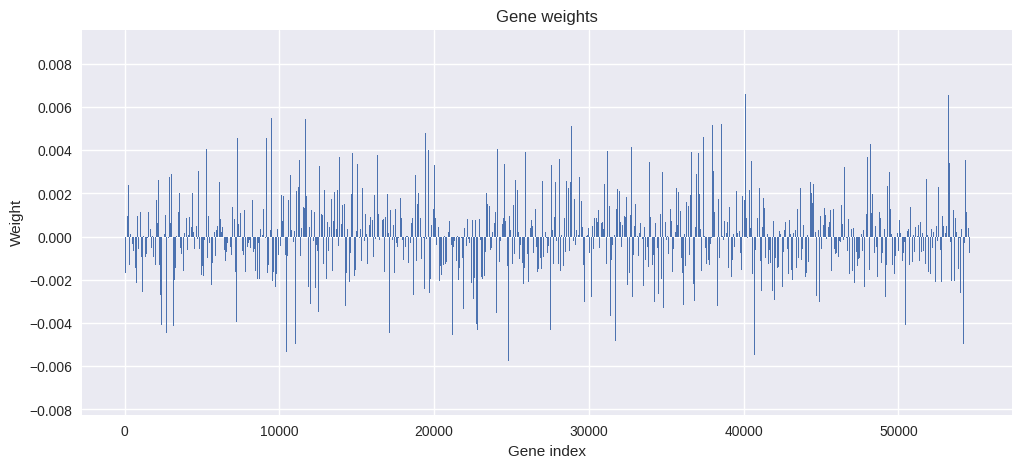

In [103]:
# get the weight matrix between input layer and first hidden layer
weights = clf.coefs_[0]

# transform weights back to original feature space
gene_weights = np.dot(weights.T,  pca.components_)

# plot the weights for each gene
fig1 = plt.figure(figsize=(12, 5))
plt.bar(range(gene_weights.shape[1]), gene_weights[0])
plt.title('Gene weights')
plt.xlabel('Gene index')
plt.ylabel('Weight')
fig1.savefig('overall gene weights.png', transparent=True)
plt.show()

In [ ]:
# get the indices of the top 10 genes with highest weights
top_gene_indices = np.argsort(-gene_weights)[0][:10]

# extract the names of the top 10 genes
top_gene_names = [X_train.columns[i] for i in top_gene_indices]
print(top_gene_names)

['HERC4', '241001_at', '1561361_at', '244066_at', '230764_at', '224766_at', 'JMJD2B', 'C19orf2', '230493_at', '244107_at']


In [ ]:
# get the index of the top 100 genes with the most weight for each label
top_genes_idx = np.argsort(gene_weights, axis=0)[-10:]

# get the names of the top genes
top_genes = [X_train.columns[i] for i in top_genes_idx]

# create a dictionary to store the top genes for each label
top_genes_dict = {}
for i, label in enumerate(y_train.unique().tolist()):
    label_top_genes = []
    for idx in top_genes_idx[:, i]:
        gene_name = X_train.columns[idx]
        label_top_genes.append(gene_name)
    top_genes_dict[label] = label_top_genes

In [ ]:
print(top_genes_dict)

{'medulloblastoma': ['1552277_a_at', '1552309_a_at', '1552269_at', '1552310_at', '1552275_s_at', 'PAX8', '1552280_at', 'RFC2', '1552281_at', '1552276_a_at'], 'ependymoma': ['1552269_at', 'EPHB3', '1552304_at', 'RFC2', 'THRA', 'GUCA1A', '1552261_at', '1552280_at', 'PTPN21', '1552310_at'], 'normal': ['RFC2', '1552288_at', '1552278_a_at', '1552277_a_at', 'THRA', '1552280_at', 'EPHB3', '1552310_at', '1552261_at', 'GUCA1A'], 'pilocytic_astrocytoma': ['1552302_at', '1552286_at', '1552280_at', 'UBA7', 'CYP2E1', 'EPHB3', '1552263_at', '1552256_a_at', '1552306_at', '1552311_a_at'], 'glioblastoma': ['PAX8', '1552301_a_at', '1552311_a_at', '1552289_a_at', '1552275_s_at', '1552271_at', 'UBA7', '1552257_a_at', 'CCL5', '1552258_at']}


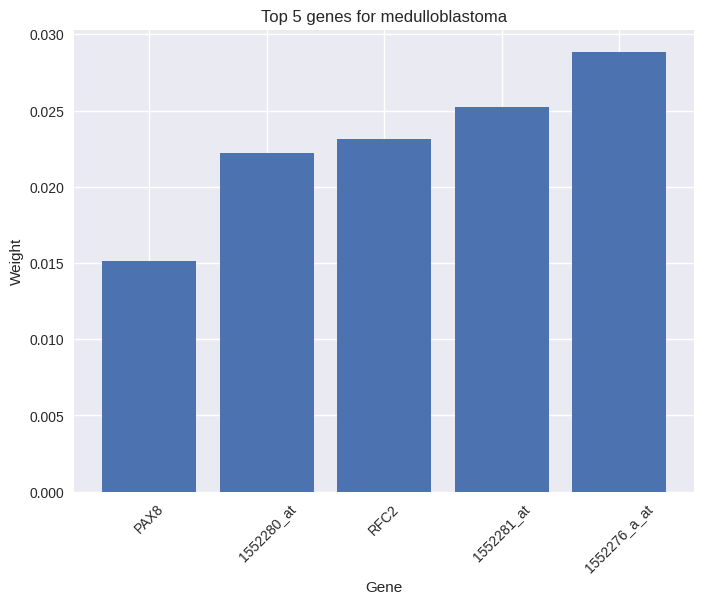

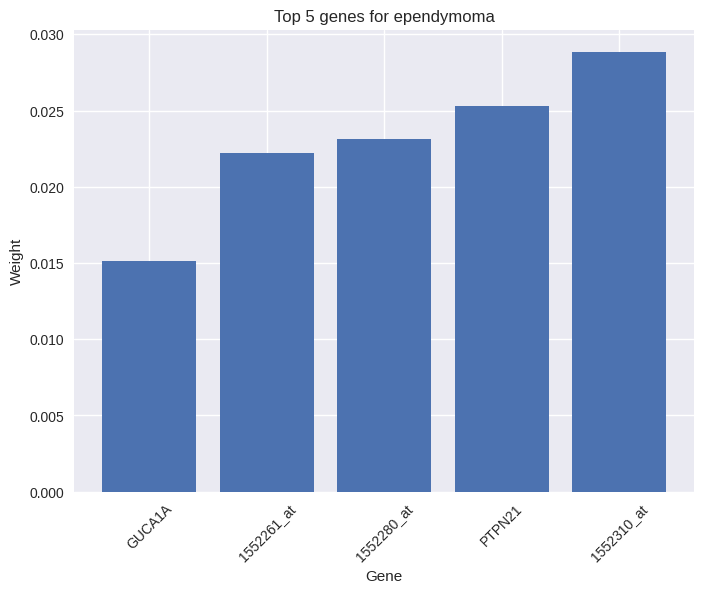

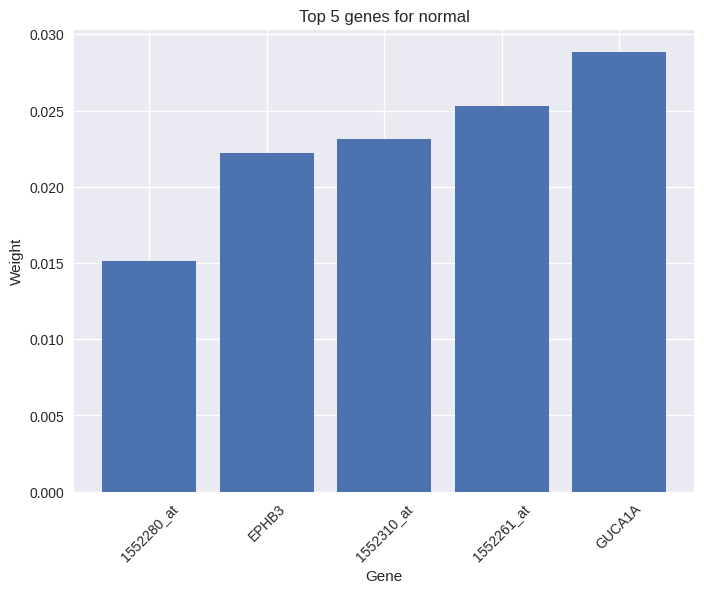

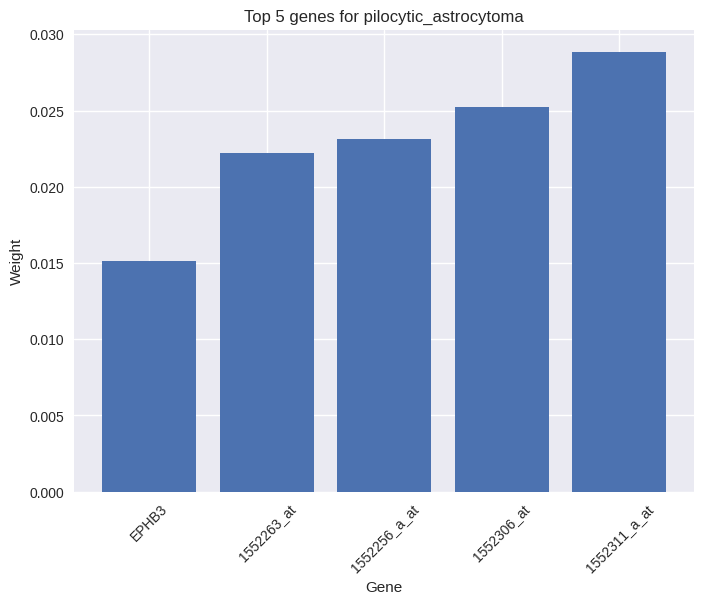

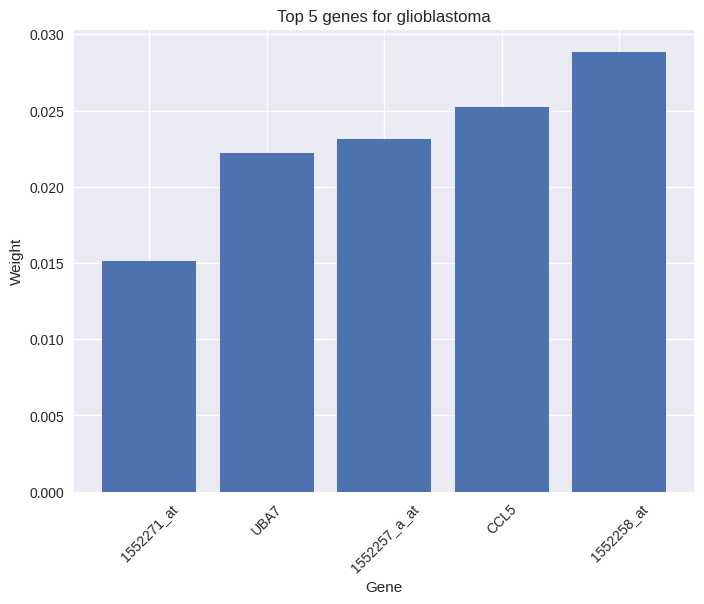

In [ ]:
import matplotlib.pyplot as plt

# get the index of the top 5 genes with the most weight for each label
top_genes_idx = np.argsort(gene_weights, axis=0)[-5:]

# get the names of the top 5 genes
top_genes = [X_train.columns[i] for i in top_genes_idx]

# create a dictionary to store the top 5 genes for each label
top_genes_dict = {}
for i, label in enumerate(y_train.unique().tolist()):
    label_top_genes = []
    for idx in top_genes_idx[:, i]:
        gene_name = X_train.columns[idx]
        label_top_genes.append(gene_name)
    top_genes_dict[label] = label_top_genes

# plot the importance of the top 5 genes for each label
for label in top_genes_dict:
    plt.figure(figsize=(8,6))
    plt.style.use("seaborn-v0_8")
    plt.bar(top_genes_dict[label], gene_weights[top_genes_idx[:, i], i])
    plt.title(f"Top 5 genes for {label}")
    plt.xlabel('Gene')
    plt.ylabel('Weight')
    plt.xticks(rotation=45)
    plt.show()

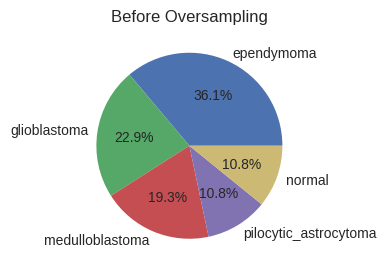

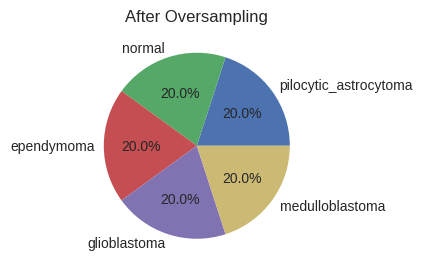

In [104]:
import matplotlib.pyplot as plt
fig1 = plt.figure(0, figsize = (3, 4))
plt.pie(y_train.value_counts(), labels = y_train.value_counts().index, autopct='%.1f%%')
plt.style.use("seaborn-v0_8")
plt.title('Before Oversampling')
fig1.savefig('temp.png', transparent=True)

fig2 = plt.figure(1, figsize = (3, 4))
plt.pie(y_train_sampled.value_counts(), labels = y_train_sampled.value_counts().index, autopct='%.1f%%')
plt.style.use("seaborn-v0_8")
plt.title('After Oversampling')
fig2.savefig('temp2.png', transparent=True)